# Plots for Research Presentations from CU Boulder 2024 Visit

A collection of plots I had to make for presentations I gave to colleagues, just to have it all in one place.

In [5]:
library(ggplot2)
library(dplyr)
library(mvtnorm)
library(tidyverse)
library(data.table)
library(gridExtra)
library(knitr)
library(ggExtra)
library(ggpubr)
library(extRemes)
library(latex2exp)
library(cowplot)

In [27]:
getwd()

[1] "/global/u1/j/jbbutler/isolines_uq/notebooks/confidence_region_notebooks"

In [6]:
# load perlmutter scratch filepath signature
perlpath <- Sys.getenv('PSCRATCH')

# load self-made functions
source('~/isolines_uq/scripts/R/auxiliary_scripts/distributionIsolines.R')
source('~/isolines_uq/scripts/R/auxiliary_scripts/projection.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/auxiliary_scripts/utils.R')
source('~/isolines_uq/scripts/R/confidence_regions_procedure/confidenceRegions.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/auxiliary_scripts/orig_isolines.R')

## Bivariate Data Distributions of Karachi and Santa Ana Data

In [7]:
# uploading AI and AD datasets from Cooley et al. (2019)
load('~/isolines_uq/data/cooley_data/karachiDatDaily.Rdata')
karachi_data <- karachiDatDaily[,c(3,4)]
colnames(karachi_data) <- c('X1', 'X2')
load('~/isolines_uq/data/cooley_data/santaAnaBivariate.Rdata')
santa_ana_data <- saDat[,c(4,5)]
colnames(santa_ana_data) <- c('X1', 'X2')

ignition_dates = saDat %>% filter(date == '10/21/07' | date == '11/15/08' | date == '10/25/03')
heat_wave_dates = karachiDatDaily %>% filter(date >= '06/20/15', date <= '06/25/15')

In [8]:
pltSA <- ggplot() + geom_point(data=santa_ana_data, aes(x = X1, y = X2), alpha=0.2) + 
xlab('Windspeed (m/s)') + ylab('Negative Relative Humidity (-%)') + 
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=F) +
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))
pltSA_margins <- ggMarginal(pltSA, type='histogram')

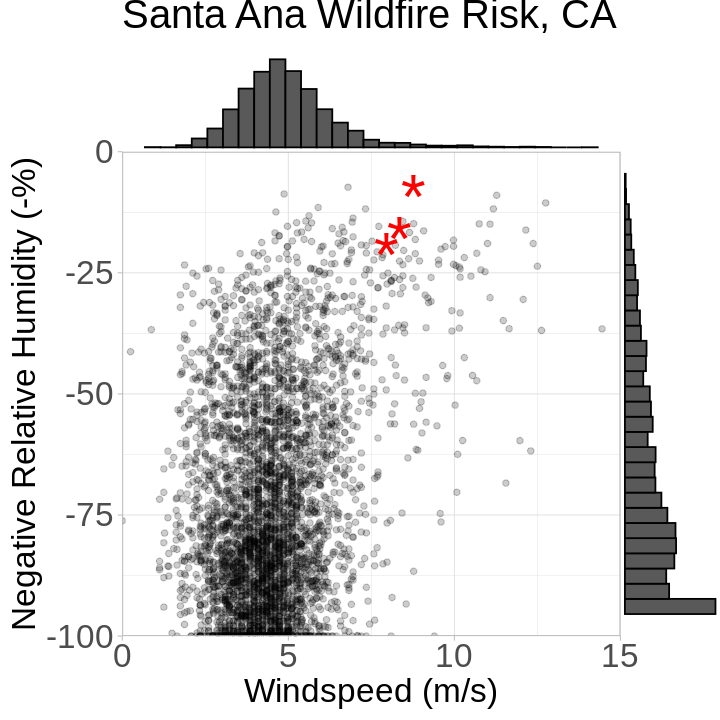

In [9]:
pltSA_margins

In [10]:
pltKa <- ggplot() + geom_point(data=karachi_data, aes(x = X1, y = X2), alpha=0.1) + 
geom_point(data=heat_wave_dates, aes(x = temp, y = relHum), color = 'red', size=13, shape='*') +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + theme_light() +
ggtitle('Heat Wave Risk, Karachi') + 
coord_cartesian(ylim=c(10, 100), xlim = c(75, 115)) +
theme(legend.position = c(0.75, 0.87), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))
pltKa_margins <- ggMarginal(pltKa, type='histogram')

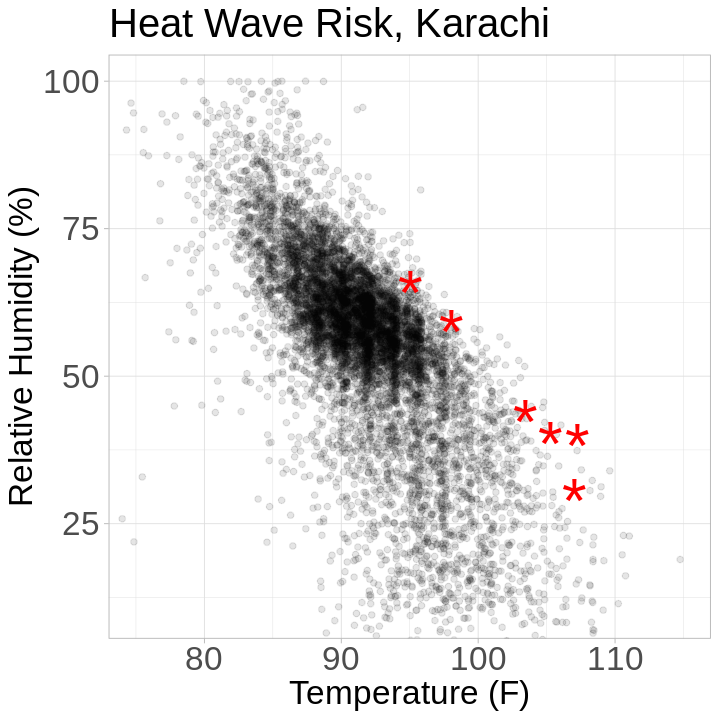

In [11]:
pltKa

In [12]:
options(repr.plot.width=13, repr.plot.height=6, scipen=999)
p = cowplot::plot_grid(pltSA_margins, pltKa_margins,
                   ncol = 2,
                   rel_heights = c(2, 1/2))

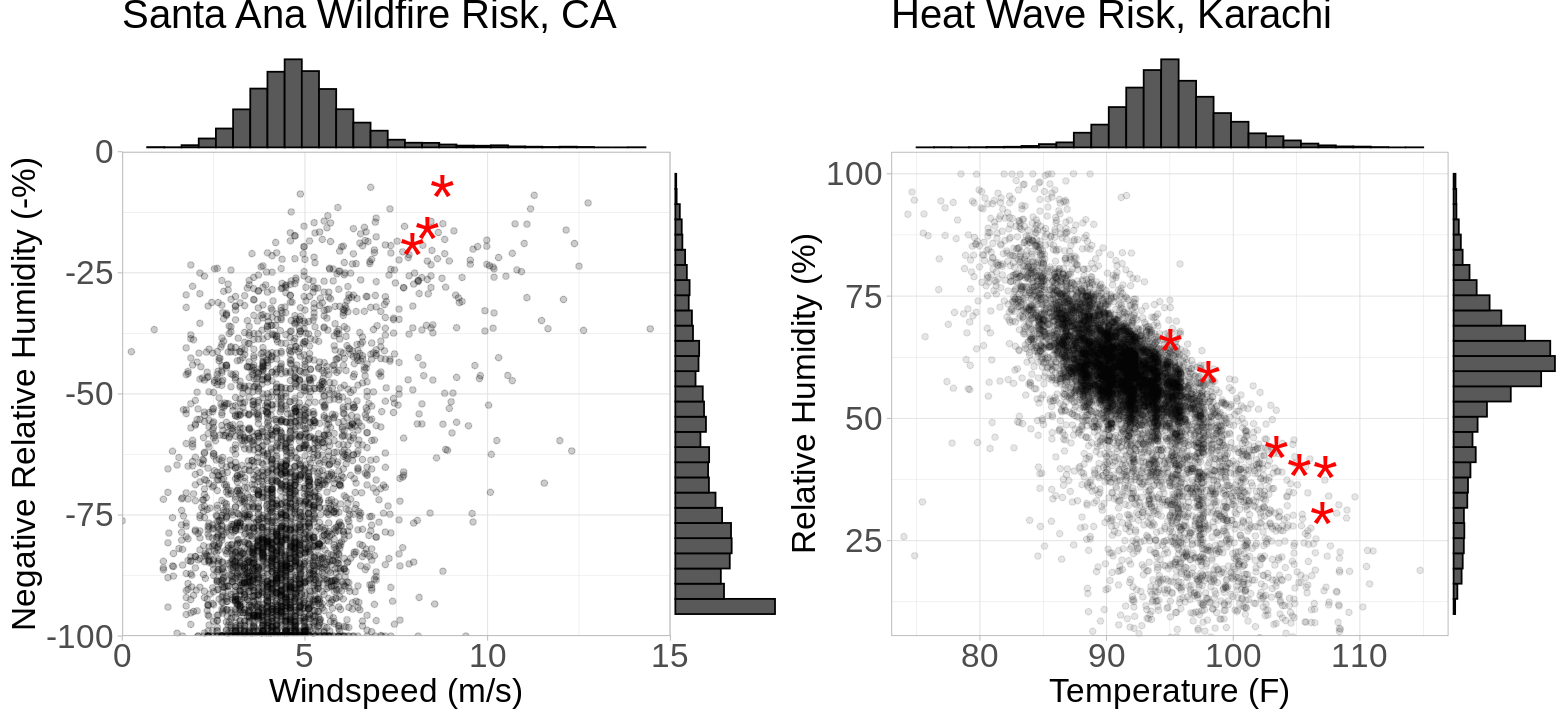

In [13]:
p

In [14]:
ggsave(filename='~/isolines_uq/plots/bivariate_extremes_intro.png', plot=p, device='png', width=13, height=6)

## Univariate Quantile vs. Bivariate Isoline Plot

In [15]:
p <- 0.001
univariate_dat <- rnorm(n=5000)
univariate_q <- qnorm(1-0.001)
multivariate_dat <- data.frame(rmvnorm(n=5000, sigma = matrix(c(1, 0.7, 0.7, 1), nrow=2)))
multivariate_isoline <- drawBivGaussIsoline(numCoords=500, gridUbs=c(10, 10), gridLbs = c(-2,-2), prob=p)

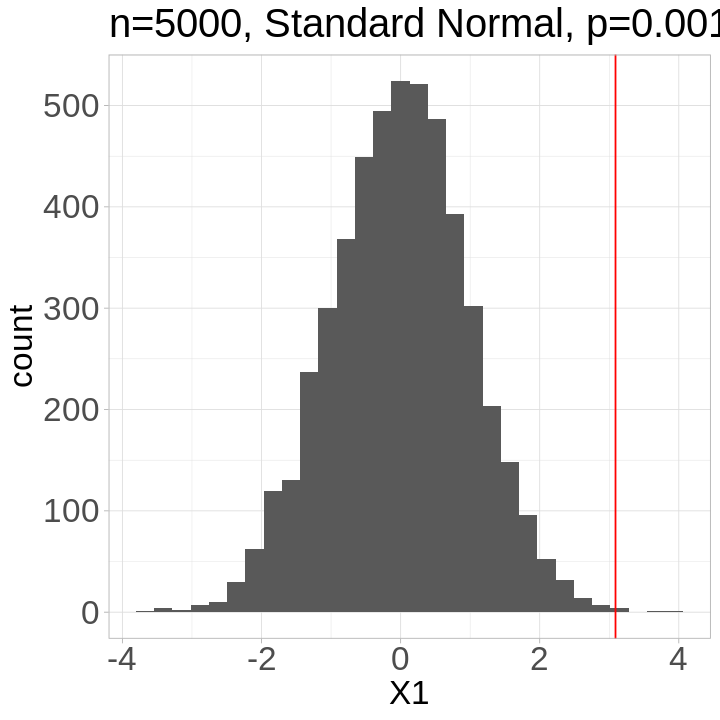

In [16]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)
plt1 <- ggplot() + geom_histogram(data=multivariate_dat, aes(x=X1), bins=30) + 
    ggtitle('n=5000, Standard Normal, p=0.001') + 
    geom_vline(xintercept=univariate_q, color='red') + 
    theme_light() +
    theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      text = element_text(size = 20),
      plot.title = element_text(size=24))
plt1

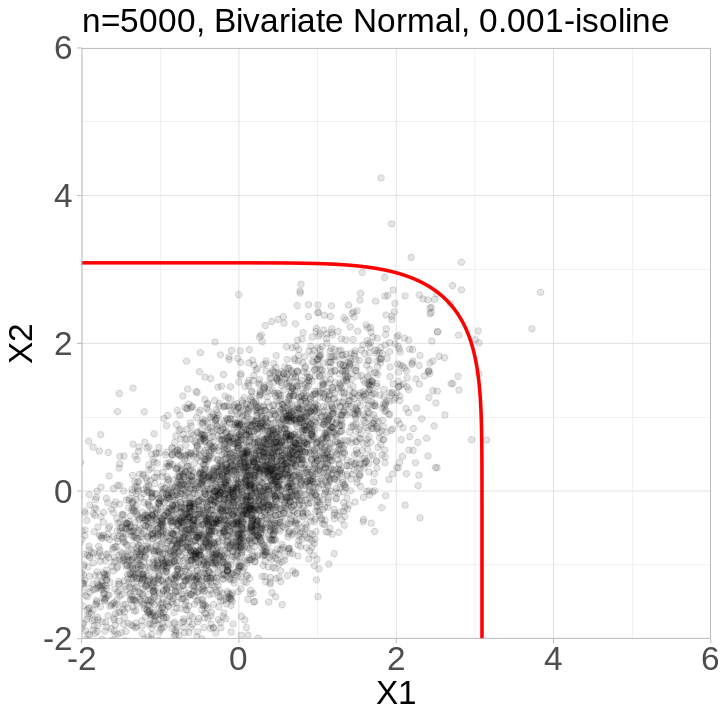

In [24]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

plt2 <- ggplot() + geom_point(data=multivariate_dat, aes(x=X1, y=X2), alpha=0.1) + geom_line(data=multivariate_isoline, aes(x=X1, y=X2), col='red', size=1) +
coord_cartesian(ylim=c(-2, 6), xlim = c(-2, 6), expand=0) + 
#annotate("rect", fill = "blue", alpha = 0.2, 
#        xmin = as.numeric(multivariate_isoline[150,])[1], xmax = 12,
#        ymin = as.numeric(multivariate_isoline[150,])[2], ymax = 12) +
#annotate("rect", fill = "blue", alpha = 0.2, 
#        xmin = as.numeric(multivariate_isoline[400,])[1], xmax = 12,
#        ymin = as.numeric(multivariate_isoline[400,])[2], ymax = 12) 
theme_light() +
ggtitle('n=5000, Bivariate Normal, 0.001-isoline') +
theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      text = element_text(size = 20),
      plot.title = element_text(size=20))

plt2
ggsave(filename='~/isolines_uq/plots/bivariate_ex.png', plot=plt2, device='png', width=6, height=6)

In [ ]:
options(repr.plot.width=6, repr.plot.height=6, scipen=999)

plt2 <- ggplot() + geom_point(data=multivariate_dat, aes(x=X1, y=X2), alpha=0.1) + geom_line(data=multivariate_isoline, aes(x=X1, y=X2), col='red', size=1) +
coord_cartesian(ylim=c(-2, 6), xlim = c(-2, 6), expand=0) + 
annotate("rect", fill = "blue", alpha = 0.2, 
        xmin = as.numeric(multivariate_isoline[150,])[1], xmax = 12,
        ymin = as.numeric(multivariate_isoline[150,])[2], ymax = 12) +
annotate("rect", fill = "blue", alpha = 0.2, 
        xmin = as.numeric(multivariate_isoline[400,])[1], xmax = 12,
        ymin = as.numeric(multivariate_isoline[400,])[2], ymax = 12) 
theme_light() +
ggtitle('n=5000, Bivariate Normal, 0.001-isoline') +
theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      text = element_text(size = 20),
      plot.title = element_text(size=20))

plt2

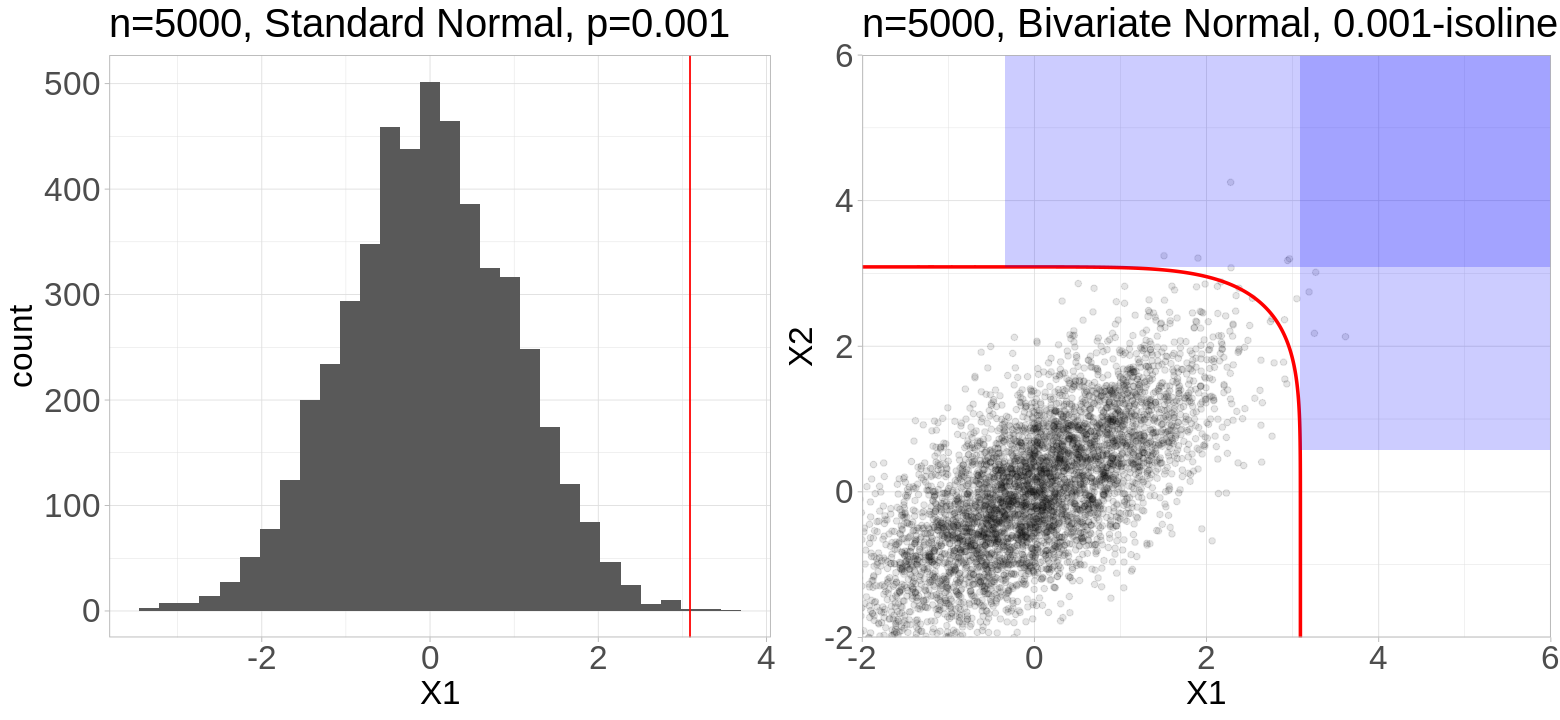

In [71]:
options(repr.plot.width=13, repr.plot.height=6, scipen=999)
p = cowplot::plot_grid(plt1, plt2,
                   ncol = 2,
                   rel_heights = c(2, 1/2))

In [72]:
ggsave(filename='~/isolines_uq/plots/univariate_to_bivariate.png', plot=p, device='png', width=13, height=6)

## Bivariate Data Distributions with Isolines

In [73]:
lbs <- c(0, -100)
ubs <- c(15, 0)

p <- 0.05
qs <- c(0.005, 0.001, 0.0005)

# using original function from Cooley (2019)
res <- xContours(dat=santa_ana_data, baseContourLevel=p, projContourLevels=qs, gridSize=100)
q_isolines_SA <- res$projContours

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [74]:
pltSA <- ggplot() + geom_point(data=santa_ana_data, aes(x = X1, y = X2), alpha=0.2) + 
xlab('Windspeed (m/s)') + ylab('Negative Relative Humidity (-%)') + 
geom_line(data=data.frame(q_isolines_SA[[1]]), aes(x = X1, y = X2, color = '0.005-isoline'), size=1) +
geom_line(data=data.frame(q_isolines_SA[[2]]), aes(x = X1, y = X2, color = '0.001-isoline'), size=1) +
geom_line(data=data.frame(q_isolines_SA[[3]]), aes(x = X1, y = X2, color = '0.0005-isoline'), size=1) +
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=F) +
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))
pltSA_margins <- ggMarginal(pltSA, type='histogram')

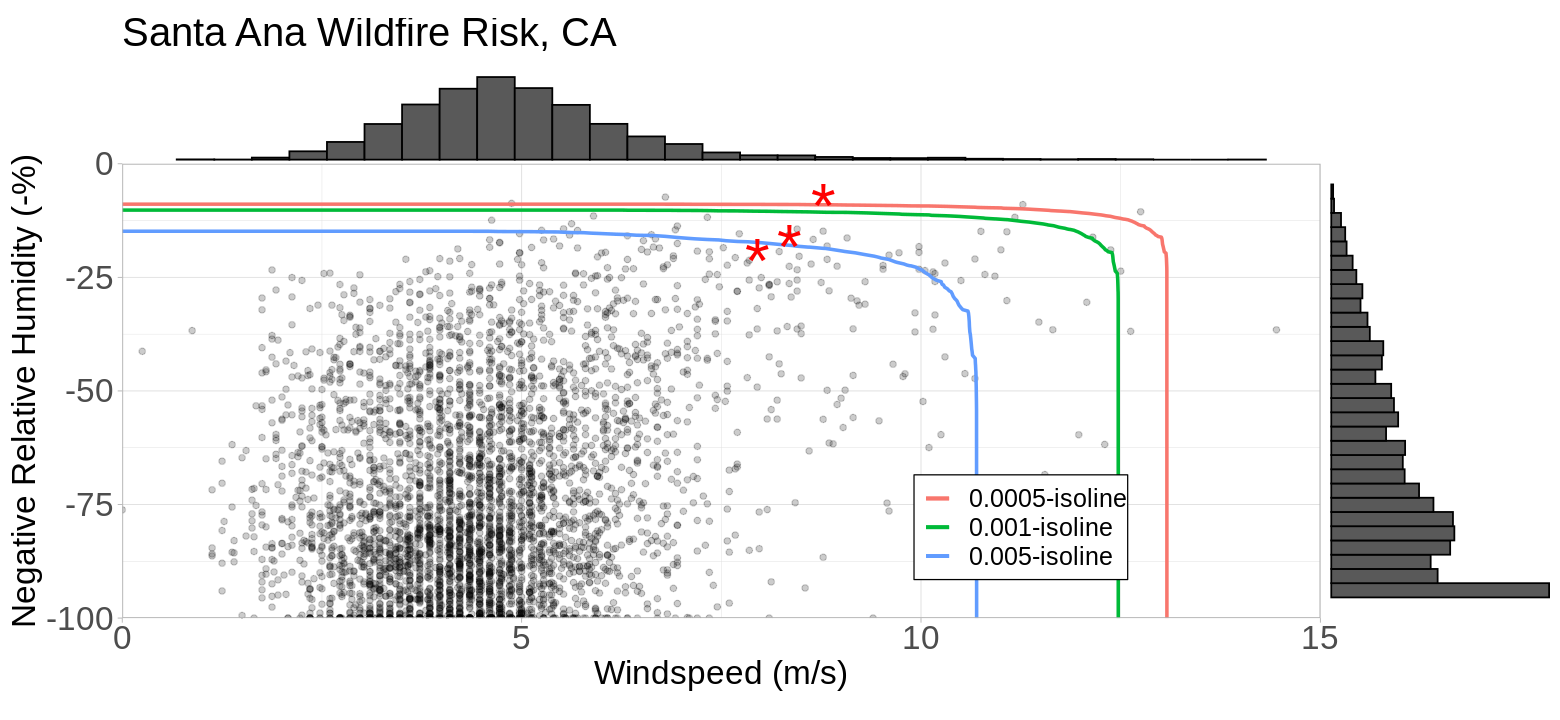

In [75]:
pltSA_margins$vp = grid::viewport(height=0.95, width=1)
pltSA_margins

In [76]:
lbs <- c(50, 0)
ubs <- c(140, 100)

p <- 0.01
qs <- c(0.005, 0.001, 0.0005)

# using original function from Cooley (2019)
res <- xContours(dat=karachi_data, baseContourLevel=p, projContourLevels=qs, asympIndep=TRUE, gridSize=100)
q_isolines_K <- res$projContours

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

In [77]:
pltKa <- ggplot() + geom_point(data=karachi_data, aes(x = X1, y = X2), alpha=0.1) + 
geom_line(data=data.frame(q_isolines_K[[1]]), aes(x = X1, y = X2, color = '0.005-isoline'), size=1) +
geom_line(data=data.frame(q_isolines_K[[2]]), aes(x = X1, y = X2, color = '0.001-isoline'), size=1) +
geom_line(data=data.frame(q_isolines_K[[3]]), aes(x = X1, y = X2, color = '0.0005-isoline'), size=1) +
geom_point(data=heat_wave_dates, aes(x = temp, y = relHum), color = 'red', size=13, shape='*') +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + theme_light() +
ggtitle('Heat Wave Risk, Karachi') + 
coord_cartesian(ylim=c(10, 100), xlim = c(75, 115)) +
theme(legend.position = c(0.75, 0.87), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))
pltKa_margins <- ggMarginal(pltKa, type='histogram')

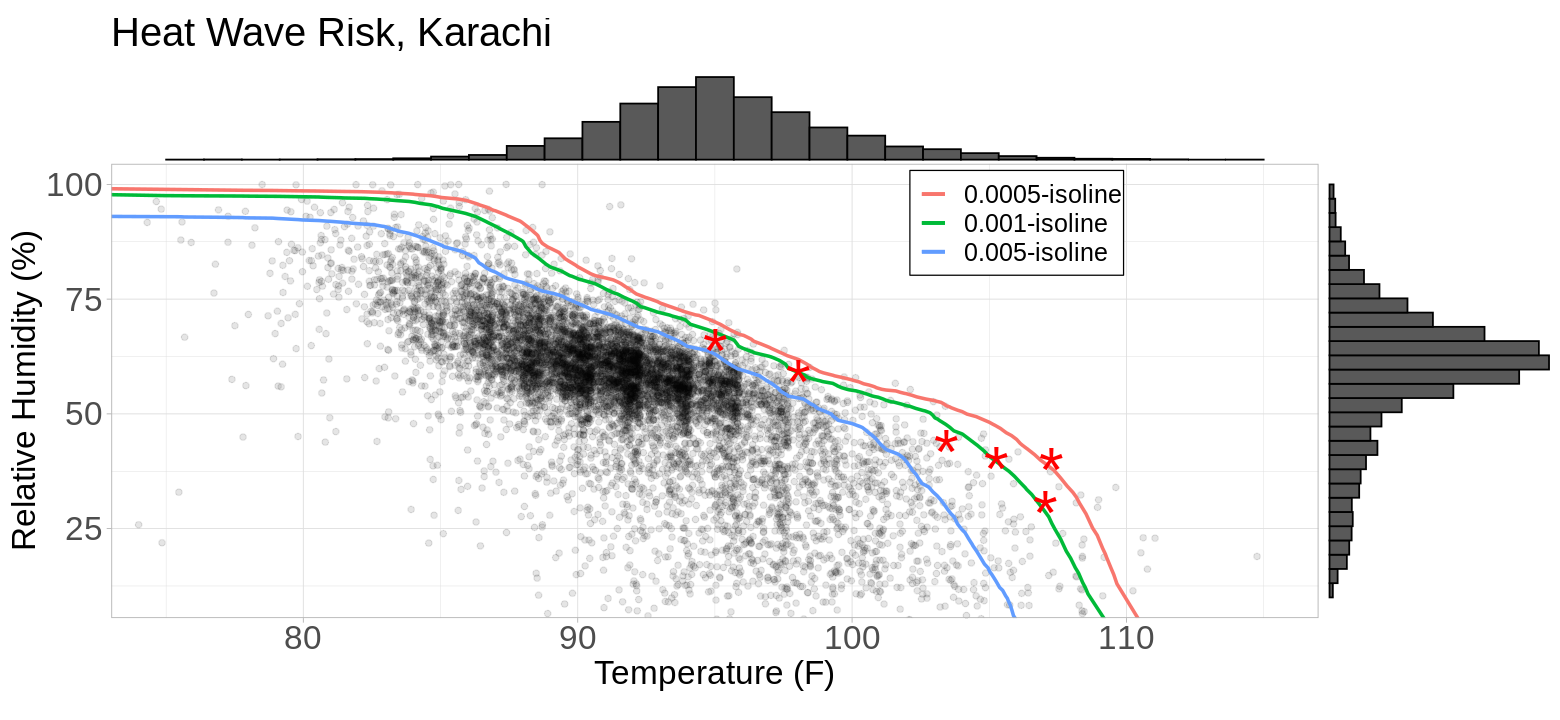

In [78]:
pltKa_margins$vp = grid::viewport(height=0.95, width=1)
pltKa_margins

In [81]:
options(repr.plot.width=13, repr.plot.height=6, scipen=999)
p = cowplot::plot_grid(pltSA_margins, pltKa_margins,
                   ncol = 2,
                   rel_heights = c(2, 1/2))

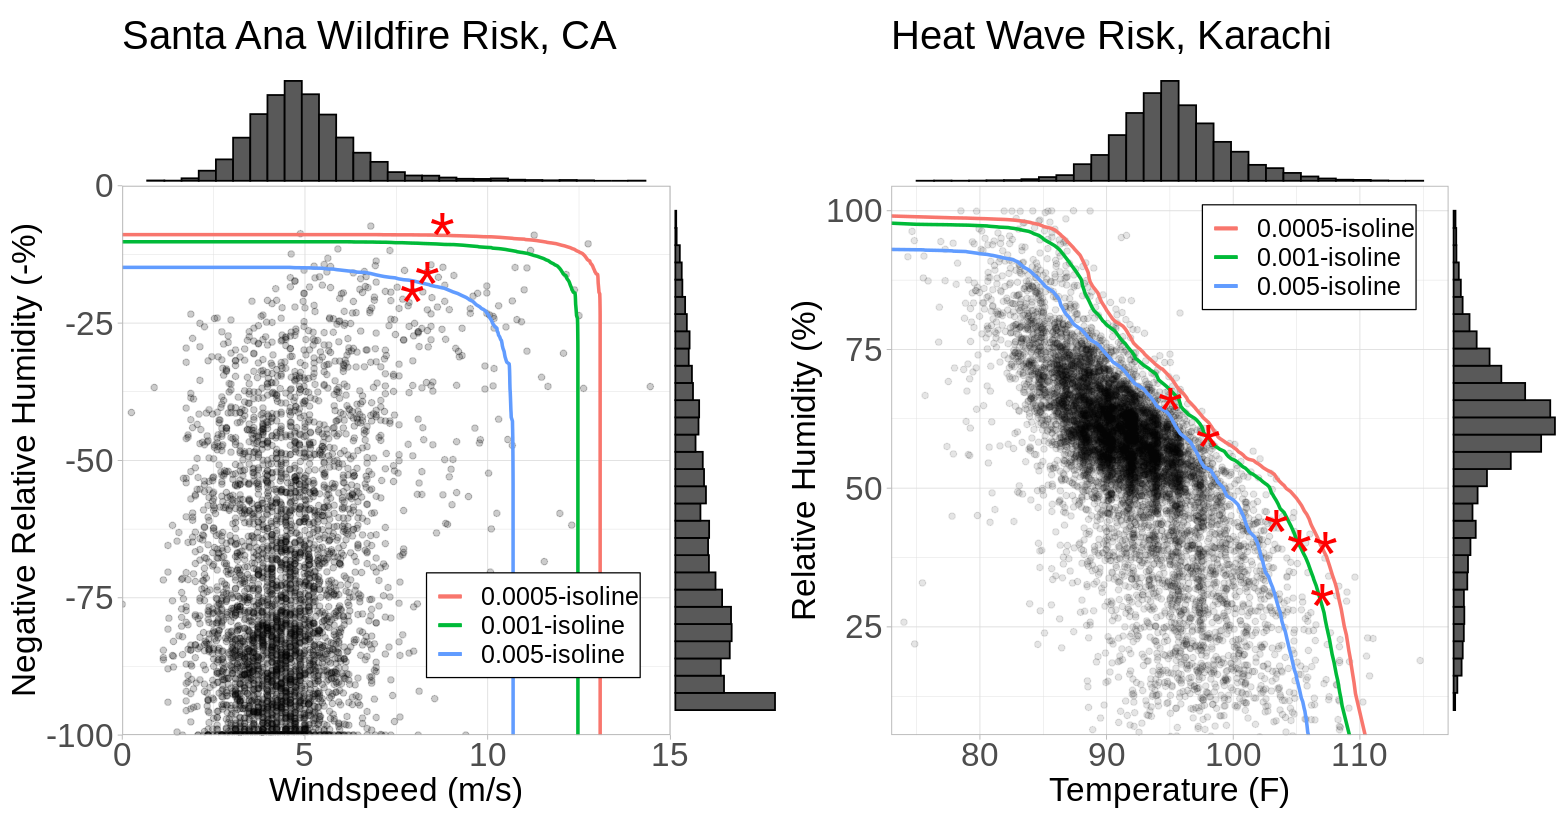

In [80]:
p

In [ ]:
ggsave(filename='~/isolines_uq/plots/bivariate_extremes_isolines.png', plot=p, device='png', width=13, height=6)

## Example of Confidence Tubes

In [83]:
lbs <- c(0, -100)
ubs <- c(15, 0)
gticks <- 400
grid <- expand.grid(X1 = seq(lbs[1], ubs[1], length.out = gticks),
                    X2 = seq(lbs[2], ubs[2], length.out = gticks))

p <- 0.01
q <- 0.001

In [84]:
grid_obj <- list()
grid_obj$lbs <- lbs
grid_obj$ubs <- ubs
grid_obj$grid <- grid

beta_funcs_dict <- list()
beta_funcs_dict[[as.character(1/2)]] <- function(n) {return((1/n)^(1/2))}

In [85]:
base_out <- drawBaseRegions(santa_ana_data, grid_obj, alphas = c(0.05), ps = c(p), B=500, beta_funcs_dict=beta_funcs_dict)
base_out <- base_out[[1]]

In [86]:
proj_out <- projectBaseRegion(base_out, proj_p=q, asympIndep=FALSE)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [87]:
end_pt_1 <- proj_out[[3]][which.min(proj_out[[3]][,2]),]
end_pt_2 <- proj_out[[4]][which.min(proj_out[[4]][,2]),]
end_pt_3 <- c(end_pt_1[1,1], -100)
end_pt_4 <- c(end_pt_2[1,1], -100)

In [88]:
tube_top <- rbind(proj_out[[3]], end_pt_3)
tube_bottom <- rbind(proj_out[[4]], end_pt_4)

In [89]:
res <- xContours(dat=santa_ana_data, baseContourLevel=p, projContourLevels=c(q), asympIndep=FALSE, gridSize=100)
q_isolines_SA <- res$projContours

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [90]:
end_isoline_pt <- q_isolines_SA[[1]]

In [91]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

polygon1 <- rbind(tube_top, 
                 data.frame(t(rev(data.frame(t(tube_bottom))))))

plt_SA_2 <- ggplot() + geom_point(data=base_out$data, aes(x=X1, y=X2), alpha=0.1) + 
geom_line(data=tube_top, aes(x=X1, y=X2)) +
geom_line(data=tube_bottom, aes(x=X1, y=X2)) +
geom_polygon(data=polygon1, aes(x=X1, y=X2, fill='0.001-tube'), alpha=0.2) +
geom_line(data=data.frame(q_isolines_SA[[1]]), aes(x=X1, y=X2, color='0.001-isoline'), size=1) +
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=FALSE) +
xlab('Wind Speed (m/s)') + ylab('Negative Relative Humidity (-%)') + 
ggtitle('Santa Ana Wildfire Risk, CA') +
scale_color_manual(values=c('#F8766D')) +
scale_fill_manual(values=c('#F8766D')) +
theme_light() +
theme(legend.position = c(0.80, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=20),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"),
      plot.margin = margin(1,25,1,1))

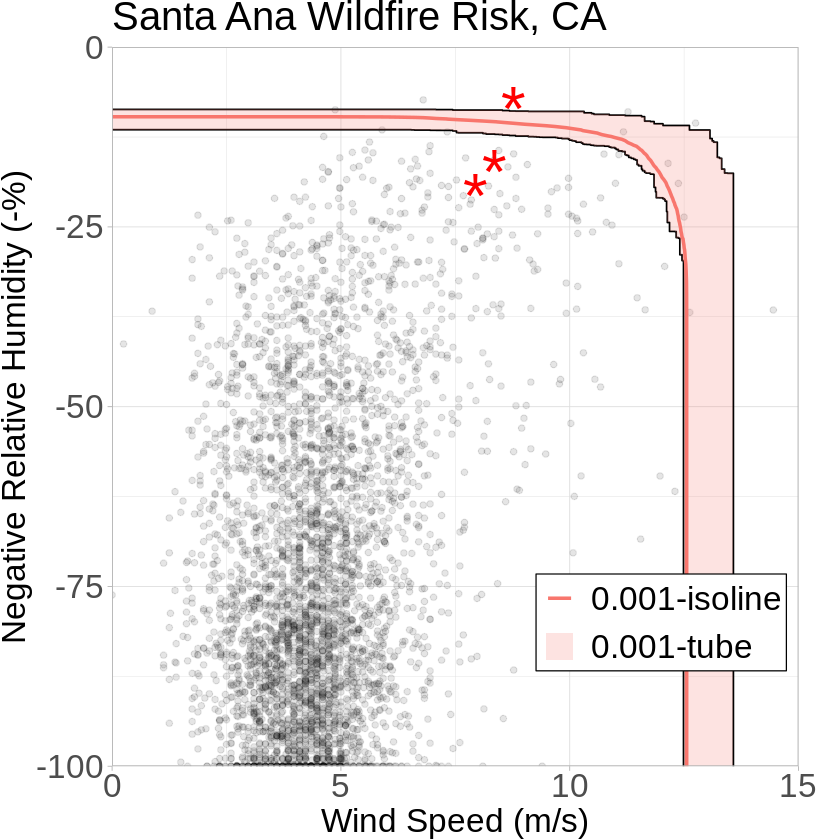

In [92]:
plt_SA_2

In [93]:
lbs <- c(50, 0)
ubs <- c(140, 100)
gticks <- 400 
grid <- expand.grid(X1 = seq(lbs[1], ubs[1], length.out = gticks),
                    X2 = seq(lbs[2], ubs[2], length.out = gticks))

p <- 0.01
q <- 0.001

In [94]:
grid_obj <- list()
grid_obj$lbs <- lbs
grid_obj$ubs <- ubs
grid_obj$grid <- grid

beta_funcs_dict <- list()
beta_funcs_dict[[as.character(1/2)]] <- function(n) {return((1/n)^(1/2))}

In [95]:
base_out <- drawBaseRegions(karachi_data, grid_obj, alphas = c(0.05), ps = c(p), B=500, beta_funcs_dict=beta_funcs_dict)
base_out <- base_out[[1]]

In [96]:
proj_out <- projectBaseRegion(base_out, proj_p=q, asympIndep=TRUE)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

In [97]:
res <- xContours(dat=karachi_data, baseContourLevel=p, projContourLevels=c(q), asympIndep=TRUE, gridSize=100)
q_isolines_K <- res$projContours

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [98]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

polygon1 <- rbind(proj_out[[3]], 
                 data.frame(t(rev(data.frame(t(proj_out[[4]]))))))

plt_KA_2 <- ggplot() + geom_point(data=base_out$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=proj_out[[3]], aes(x=X1, y=X2)) +
geom_line(data=proj_out[[4]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon1, aes(x=X1, y=X2, fill='0.001-tube'), alpha=0.2) +
geom_line(data=data.frame(q_isolines_K[[1]]), aes(x=X1, y=X2, color='0.001-isoline'), size=1) +
geom_point(data=heat_wave_dates, aes(x = temp, y = relHum), color = 'red', size=13, shape='*') +
coord_cartesian(ylim=c(10, 100), xlim = c(75, 115), expand=FALSE) +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + 
ggtitle('Heat Wave Risk, Karachi') +
scale_color_manual(values=c('#F8766D')) +
scale_fill_manual(values=c('#F8766D')) +
theme_light() +
theme(legend.position = c(0.80, 0.87), 
      legend.title = element_blank(),  
      axis.title = element_text(size = 20),
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=20),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"),
      plot.margin = margin(1,25,1,1))

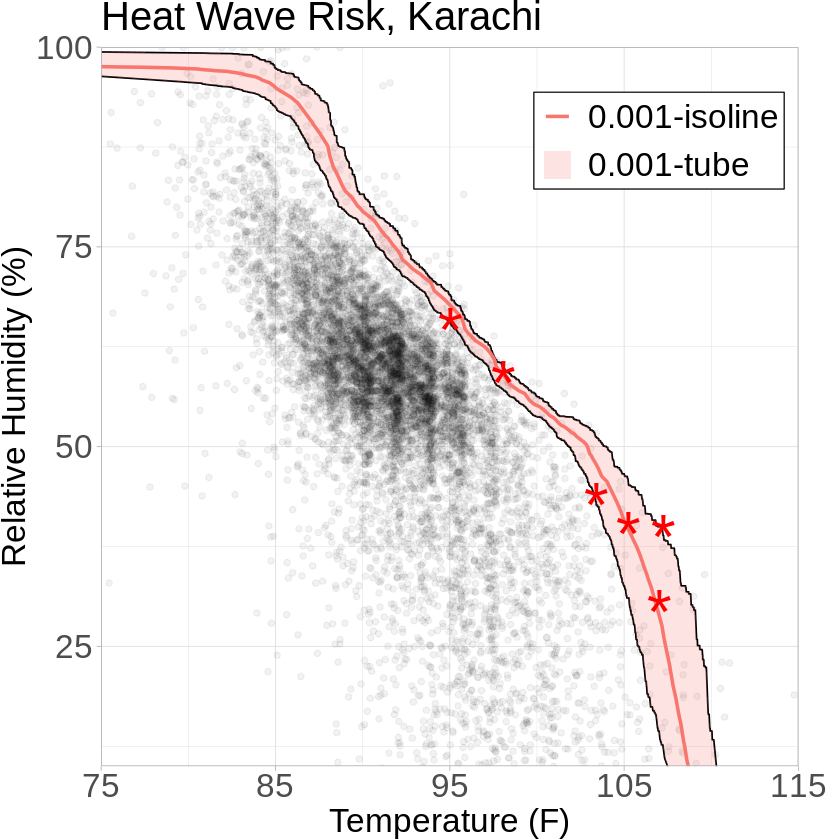

In [99]:
plt_KA_2

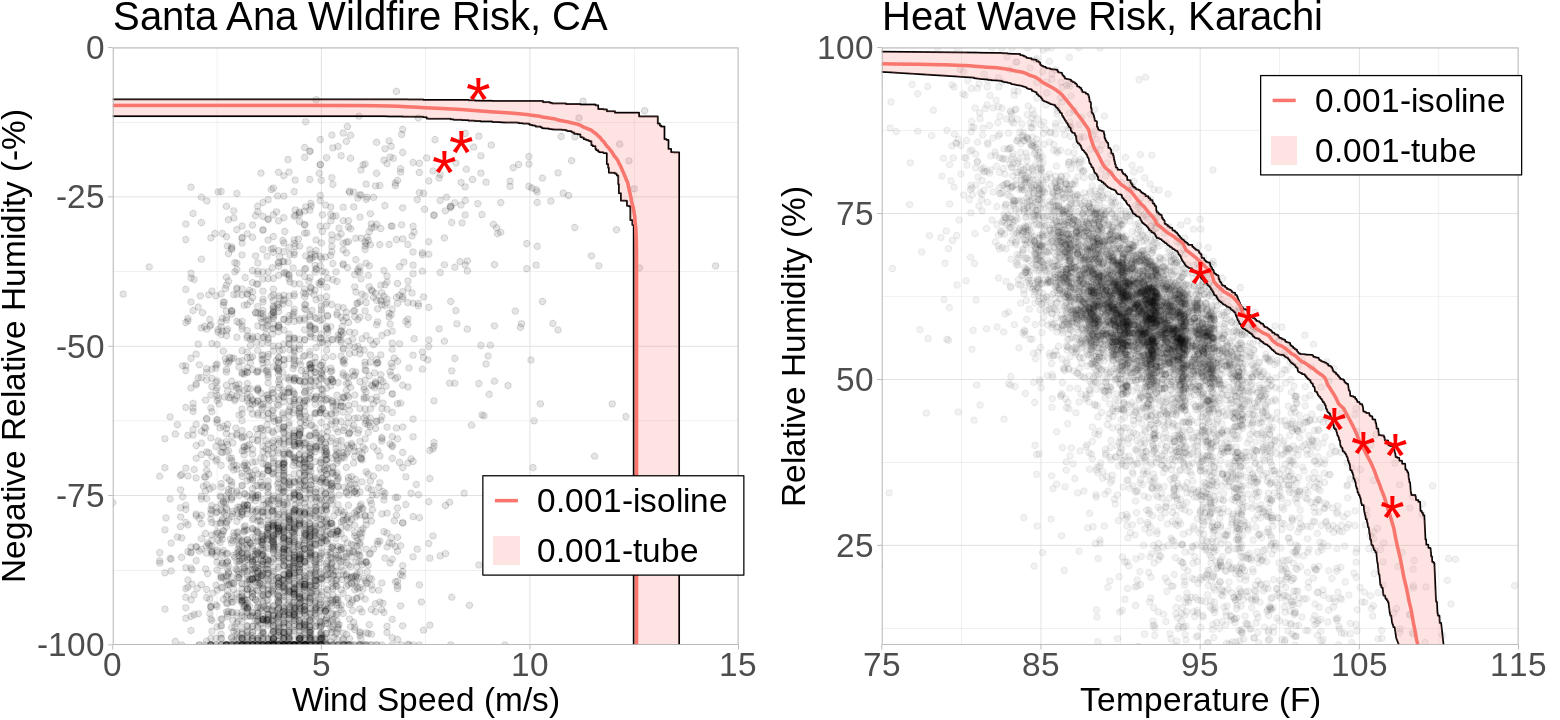

In [100]:
options(repr.plot.width=13, repr.plot.height=6, scipen=999)
p = cowplot::plot_grid(plt_SA_2, plt_KA_2,
                   ncol = 2)
p

In [101]:
ggsave(filename='~/isolines_uq/plots/confidence_tubes_ex.png', plot=p, device='png', width=13, height=6)

## Hypothesis Testing Plot

In [164]:
dat_past <- data.frame(rmvt(10000, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
dat_future <- data.frame(rmvt(10000, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 3))

In [165]:
p <- 0.05
q <- 0.001

lbs <- c(-2,-2)
ubs <- c(5,5)
gticks <- 400

grid <- expand.grid(X1 = seq(lbs[1], ubs[1], length.out = gticks),
                    X2 = seq(lbs[2], ubs[2], length.out = gticks))

beta_funcs_dict <- list()
beta_funcs_dict[[as.character(1/2)]] <- function(n) {return((1/n)^(1/2))}

grid_obj <- list()
grid_obj$lbs <- lbs
grid_obj$ubs <- ubs
grid_obj$grid <- grid

In [166]:
past_base_region <- drawBaseRegions(dat_past, grid_obj, alphas = c(0.05), ps = c(p), B=500, beta_funcs_dict=beta_funcs_dict)

In [167]:
future_base_region <- drawBaseRegions(dat_future, grid_obj, alphas = c(0.05), ps = c(p), B=500, beta_funcs_dict=beta_funcs_dict)

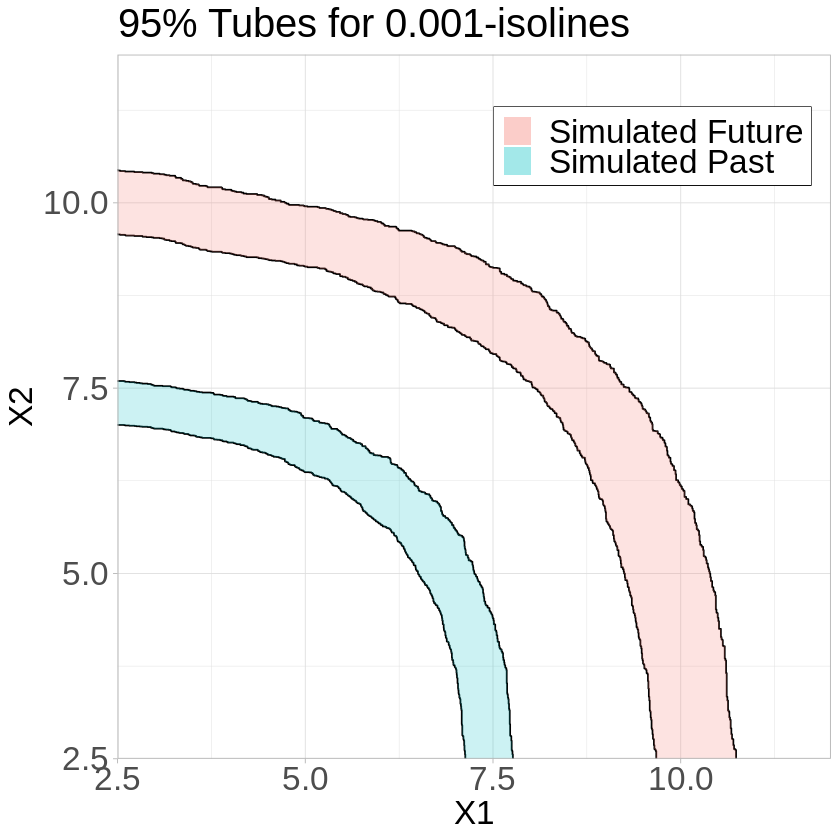

In [184]:
pbr <- past_base_region[[1]]
fbr <- future_base_region[[1]]
past_proj_region <- projectBaseRegion(pbr, proj_p=q, asympIndep=FALSE)
future_proj_region <- projectBaseRegion(fbr, proj_p=q, asympIndep=FALSE)
ppr <- past_proj_region
fpr <- future_proj_region

options(repr.plot.width=7, repr.plot.height=7)

polygon1 <- rbind(ppr[[3]], 
                 data.frame(t(rev(data.frame(t(ppr[[4]]))))))
polygon2 <- rbind(fpr[[3]], 
                 data.frame(t(rev(data.frame(t(fpr[[4]]))))))

plt <- ggplot() + 
geom_line(data=ppr[[3]], aes(x=X1, y=X2)) +
geom_line(data=ppr[[4]], aes(x=X1, y=X2)) +
geom_line(data=fpr[[3]], aes(x=X1, y=X2)) +
geom_line(data=fpr[[4]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon2, aes(x=X1, y=X2, fill='Simulated Future'), alpha=0.2) +
geom_polygon(data=polygon1, aes(x=X1, y=X2, fill='Simulated Past'), alpha=0.2) +
coord_cartesian(ylim=c(2.5, 12), xlim = c(2.5, 12), expand=0) +
xlab('X1') + ylab('X2') + 
ggtitle('95% Tubes for 0.001-isolines') +
theme_light() +
theme(legend.position = c(0.75, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=20))
plt
ggsave('~/isolines_uq/plots/future_application.png', plot=plt, device='png', width=6, height=6)

In [174]:
past_isoline <- drawBivtIsoline(numCoords=500, gridUbs=c(1,12), gridLbs=c(0,0), df=4, prob=0.001)
future_isoline <- drawBivtIsoline(numCoords=500, gridUbs=c(1,12), gridLbs=c(0,0), df=3, prob=0.001)

In [179]:
plt1 <- ggplot() + geom_point(data=dat_past, aes(x=X1, y=X2)) +
geom_line(data=past_isoline, aes(x=X1, y=X2), color='red') +
coord_cartesian(ylim=c(0, 12), xlim = c(0, 12), expand=0) + 
ggtitle('Simulated Past Data') + theme_light() + 
theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20),
      text = element_text(size = 20),
      plot.title = element_text(size=24))

In [180]:
plt2 <- ggplot() + geom_point(data=dat_future, aes(x=X1, y=X2)) + 
geom_line(data=future_isoline, aes(x=X1, y=X2), color='red') +
coord_cartesian(ylim=c(0, 12), xlim = c(0, 12), expand=0) + 
ggtitle('Simulated Future Data') + theme_light() + 
theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      text = element_text(size = 20),
      plot.title = element_text(size=24))

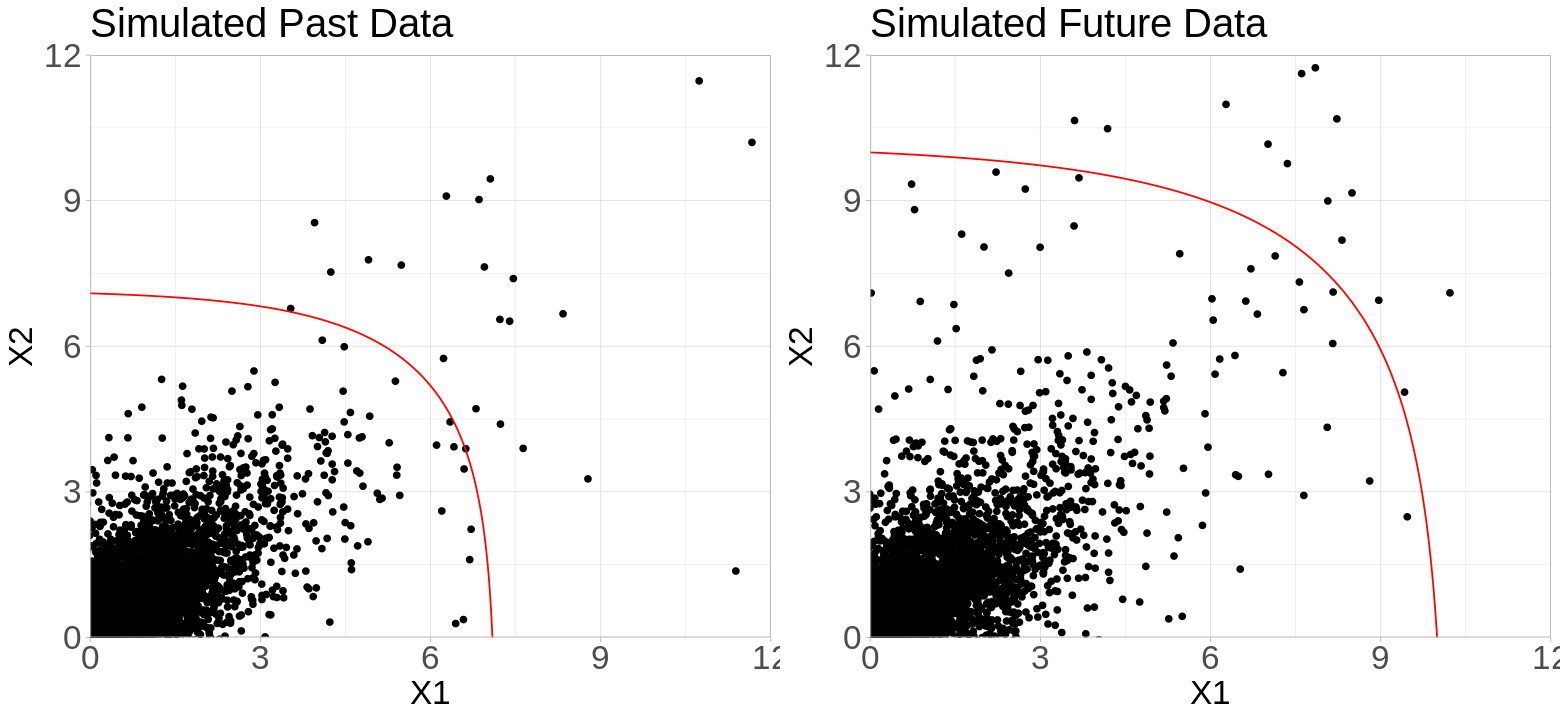

In [181]:
options(repr.plot.width=13, repr.plot.height=6, scipen=999)
p = cowplot::plot_grid(plt1, plt2,
                   ncol = 2)
p

In [186]:
ggsave('~/isolines_uq/plots/future_past_data.png', plot=p, device='png', width=13, height=6)